In [3]:
import numpy as np
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [4]:
train_dataset = MNIST(download=True, root='data', train=True, transform=ToTensor())
train_data = DataLoader(train_dataset, batch_size=64, shuffle=False)

/opt/homebrew/Caskroom/miniforge/base/envs/bachelor-project/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/runner/miniforge3/conda-bld/pytorch-recipe_1635217266490/work/torch/csrc/utils/tensor_numpy.cpp:189.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


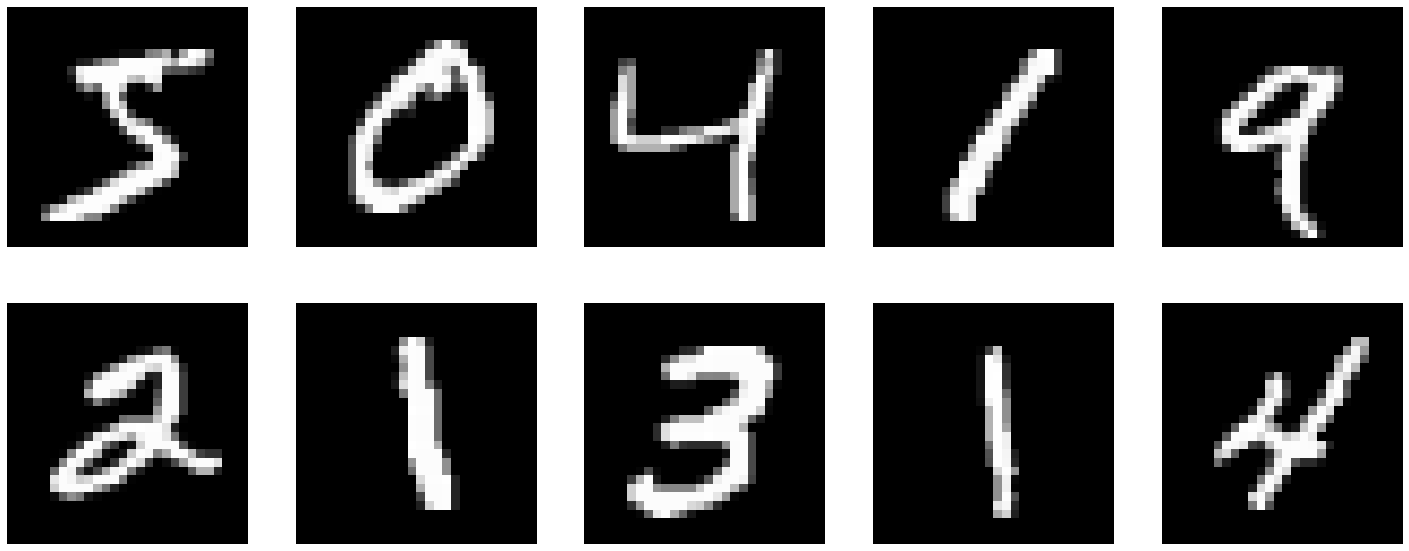

In [5]:
fig, axs = plt.subplots(2, 5, figsize=(5*5, 5*2))
for i in range(10):
  image = train_dataset[i]
  axs[i // 5, i % 5].imshow(image[0].numpy().reshape(28, 28), cmap='gray')
  axs[i // 5, i % 5].axis("off")
  

plt.show()
  

In [19]:
T_RC = 0.02
T_REF = 4e-3
V_TH = 1.0

def v(t, j=0.5, v0=0.01):
  return (v0 - j) * np.exp(-t/T_RC) + j

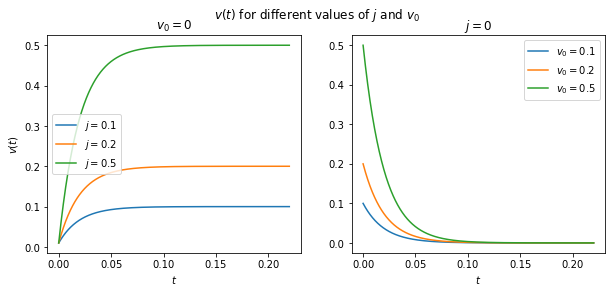

In [64]:
ts = np.linspace(0, T_RC + 0.2, 1000)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

vs = v(ts, j=0.1)
axs[0].plot(ts, vs)
vs = v(ts, j=0.2)
axs[0].plot(ts, vs)
vs = v(ts, j=0.5)
axs[0].plot(ts, vs)
axs[0].legend(["$j=0.1$", "$j=0.2$", "$j=0.5$"])
axs[0].set_title("$v_0=0$")
axs[0].set_xlabel("$t$")
axs[0].set_ylabel("$v(t)$")

vs = v(ts, j=0, v0=0.1)
axs[1].plot(ts, vs)
vs = v(ts, j=0,  v0=0.2)
axs[1].plot(ts, vs)
vs = v(ts, j=0,  v0=0.5)
axs[1].plot(ts, vs)
axs[1].legend(["$v_0=0.1$", "$v_0=0.2$", "$v_0=0.5$"])
axs[1].set_title("$j=0$")
axs[1].set_xlabel("$t$")
axs[0].set_ylabel("$v(t)$")

fig.suptitle("$v(t)$ for different values of $j$ and $v_0$")

plt.savefig("../report/graphics/lif-voltage.png")
plt.show()
